In [378]:
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import Image, ImageFont, ImageDraw 
import pandas as pd
import random
import uuid


fonts = {
    'vazir': ImageFont.truetype('vazir.ttf', 40, encoding='unic'),
    'vazir_mini': ImageFont.truetype('vazir.ttf', 32, encoding='unic'),
    'gandom': ImageFont.truetype('Gandom.ttf', 40, encoding='unic'),
    'nast': ImageFont.truetype('IranNastaliq.ttf', 40, encoding='unic')
}

In [358]:
create_data()

{'name': 'یگانه کیارستمی',
 'shop_name': 'میخک میوه',
 'list': [{'name': 'بادام زمینی',
   'count': '10',
   'price': '7500',
   'total': '75000'},
  {'name': 'انار', 'count': '6', 'price': '6500', 'total': '39000'}],
 'id': '09b43401f0a94b98',
 'base_price': '114000',
 'post_price': '3250',
 'max_price': '117250'}

In [367]:
def create_data() -> dict:
   
    number = random.randint(2, 4)
    buy_list = []
    base_price = 0
    post_price = random.randrange(500 , 5000 , 250)
    for _ in range(number):
        price = random.randrange(1000 , 10000 , 500)
        count = random.randint(2, 10)
        total = ( price * count)
        base_price = base_price + total 
        buy = {
            'name': random.choice(fruits),
            'count': str(count),
            'price': str(price),
            'total':str(total),
        }

        buy_list.append(buy)
        max_price = base_price +post_price
    return {
        'name' : f"{random.choice(first_names)} {random.choice(last_names)}" ,
        'shop_name':f"{random.choice(first_names)} میوه" ,#if cond else f"میوه فروشی {random.choice(last_names)}",
        'list':buy_list , 
        'id': uuid.uuid4().hex[:16],
        'base_price': str(base_price),
        'post_price': str(post_price),
        'max_price': str(max_price),
    }

def convert_text(persian_text :str ) -> str:
    reshaped_text = arabic_reshaper.reshape(persian_text) # correct its shape
    return get_display(reshaped_text) # correct its direction
create_data().keys()

dict_keys(['name', 'shop_name', 'list', 'id', 'base_price', 'post_price', 'max_price'])

In [160]:
fruits = ['انار' , 'خرما', 'بادام زمینی', 'بلوط', 'به', 'پسته', 'سیب', 'موز', 'پرتقال']
last_names = pd.read_json('names/last_name.json' )['name'].to_list()
first_names = pd.read_json('names/first_name.json')['name'].to_list()


In [167]:
color.items()

dict_items([('color_1', '620a72'), ('gray', '6d6d6d'), ('color_2', '831769'), ('light_gray_1', 'b4b4b4'), ('light_gray_2', 'efefef')])

In [169]:
color_hexs = {
    'color_1': '620a72',
    'gray':'6d6d6d',
    'color_2':'831769',
    'light_gray_1':'b4b4b4',
    'light_gray_2':'efefef'
}
color_rgb = {
    key:hex_to_rgb(color_hex) for key, color_hex in color.items()
}
def hex_to_rgb(hex_color_code):
    return tuple(int(hex_color_code[i:i+2], 16) for i in (0, 2, 4))

In [360]:
hex_to_rgb('eeeeee')

(238, 238, 238)

In [361]:
color_rgb

{'color_1': (98, 10, 114),
 'gray': (109, 109, 109),
 'color_2': (131, 23, 105),
 'light_gray_1': (180, 180, 180),
 'light_gray_2': (239, 239, 239)}

CPU times: user 9min 31s, sys: 612 ms, total: 9min 32s
Wall time: 9min 33s


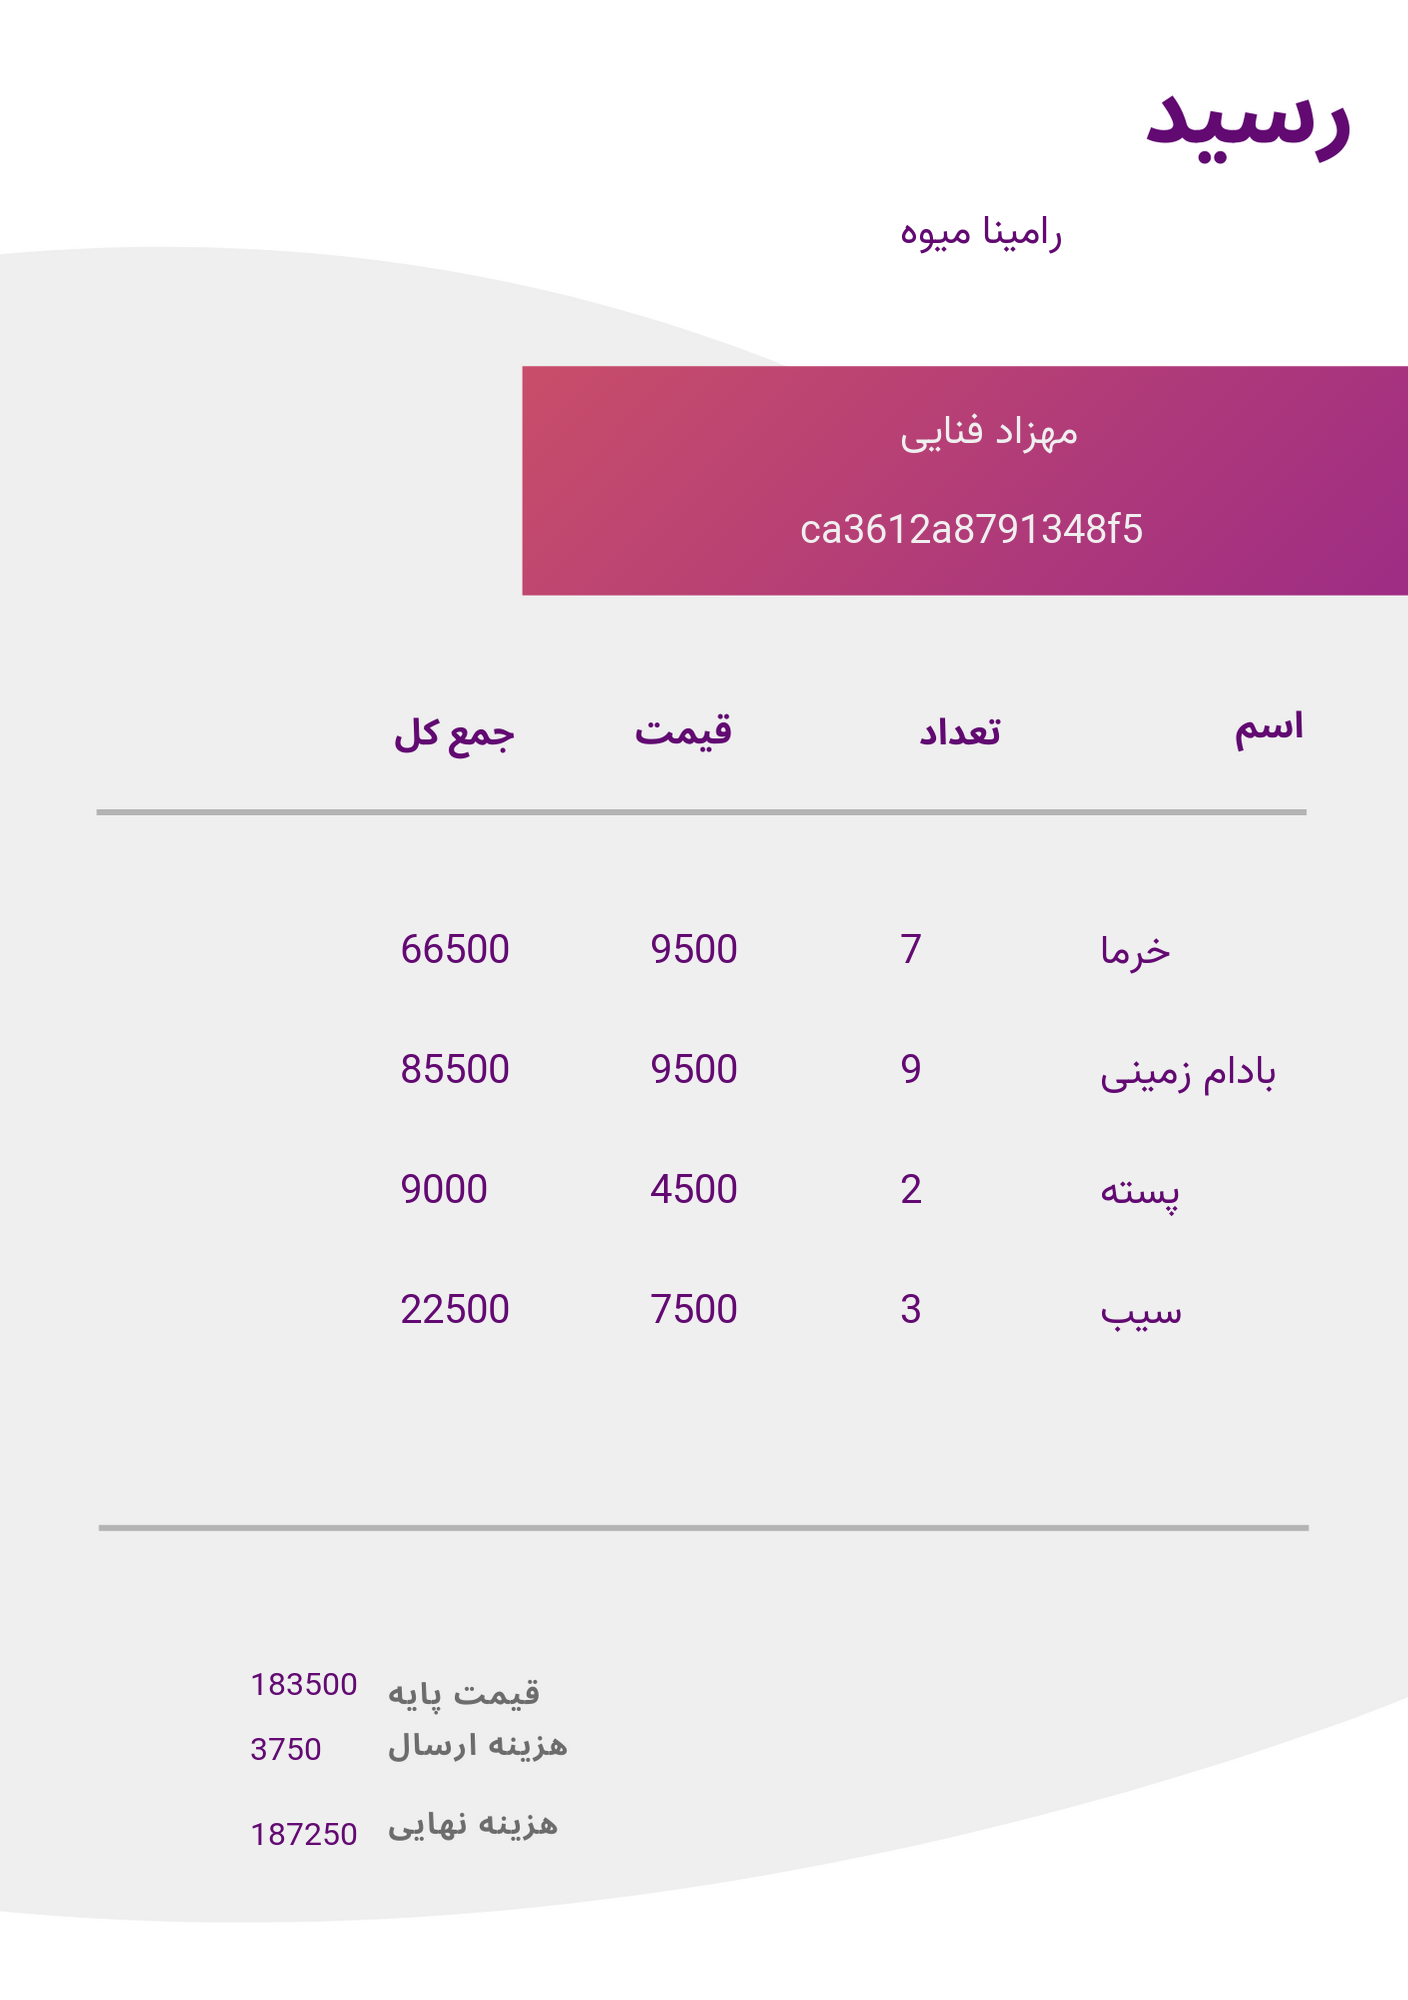

In [388]:
%%time
for i  in range(1000):
    file_name = 'raw.png'
    raw_image = Image.open(file_name) 


    draw = ImageDraw.Draw(raw_image) 
    data = create_data()




    x_y = (1100, 200)
    if len(data['shop_name']) > 10:
        x_y = (900, 200)
    elif len(data['shop_name']) > 20:
        x_y = (800, 200)
    draw.text(x_y,
              convert_text(data['shop_name']),
              color_rgb['color_1'],
              font = fonts['vazir'],
             align='center') 

    draw.text((900, 400),
              convert_text(data['name']),
              color_rgb['light_gray_2'],
              font = fonts['vazir'],
              align='center') 

    draw.text((800, 500),
              convert_text(data['id']),
              color_rgb['light_gray_2'],
              font = fonts['vazir'],
             align='center') 
    base_y = 800

    for idx , item in enumerate(data['list']):

        y = ((idx+ 1) * 120)  + base_y
        draw.text((1100, y),
              convert_text(item['name']),
              color_rgb['color_1'],
              font = fonts['vazir'],
             align='left') 

        draw.text((900, y),
              convert_text(item['count']),
              color_rgb['color_1'],
              font = fonts['vazir'],
             align='center') 

        draw.text((650, y),
              convert_text(item['price']),
              color_rgb['color_1'],
              font = fonts['vazir'],
             align='center') 

        draw.text((400, y),
              convert_text(item['total']),
              color_rgb['color_1'],
              font = fonts['vazir'],
             align='center') 

    draw.text((250, 1660),
              convert_text(data['base_price']),
              color_rgb['color_1'],
              font = fonts['vazir_mini'],
             align='center') 
    #'base_price', 'post_price', 'max_price'
    draw.text((250, 1660 + 65),
              convert_text(data['post_price']),
              color_rgb['color_1'],
              font = fonts['vazir_mini'],
             align='center') 

    draw.text((250, 1660 + 150),
              convert_text(data['max_price']),
              color_rgb['color_1'],
              font = fonts['vazir_mini'],
             align='center') 
    raw_image.save(f"data/{i}.png")
    

raw_image